In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

!pip install scanpy
#!pip install scvelo
#!pip install git+https://github.com/csgroen/scycle.git#egg=scycle
#!pip install  --no-dependencies  git+https://github.com/j-bac/elpigraph-python.git
# from elpigraph_ps_tools import *
#import elpigraph
import scanpy as sc
import anndata



import importlib
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the pa

In [ ]:
path = '/content/drive/MyDrive/msdata.h5ad'
adata = sc.read(path)

In [ ]:
from scipy.sparse import hstack

In [ ]:
adata.obs

,tsne1,tsne2,cluster_original,sample,diagnosis,stage,age,sex,region,Capbatch,...,DMGM_UL,DMGM_DL,DMWM,n_genes,percent_mito,percent_ribo,n_counts,leiden,annot_level_2,annot_level_3
AAACCTGGTCCATGAT-1_5981_BA9,19.121044,-20.540960,3,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3795,0.005292,0.002951,9827.0,14,Glutamatergic,L5_6
AAACGGGAGTAGCCGA-1_5981_BA9,5.136135,-13.751351,4,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,2510,0.005038,0.004457,5161.0,2,Glutamatergic,L2_3
AAACGGGCATCGGTTA-1_5981_BA9,-28.210752,-20.764837,6A,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3779,0.018633,0.007034,8104.0,10,GABAergic,PV
AAACGGGTCCATGAAC-1_5981_BA9,29.946121,-15.725056,2,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3376,0.016441,0.007046,7238.0,12,Glutamatergic,L4
AAAGATGCACGACTCG-1_5981_BA9,25.065271,-19.422704,3,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,4337,0.007789,0.002841,10913.0,21,Glutamatergic,L5_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTTAAGA-1_MS200_A303,-5.428651,17.107557,5,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,857,0.003260,0.011410,1227.0,0,Oligodendrocyte,Oligodendrocyte
TTTGTCAGTTCGCGAC-1_MS200_A303,34.011235,-18.509118,2,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,5463,0.010610,0.018160,14703.0,9,Glutamatergic,L4
TTTGTCAGTTCTGGTA-1_MS200_A303,-16.622547,20.910561,8,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,1560,0.018838,0.003925,2548.0,1,Astrocyte,Astrocyte
TTTGTCATCCAAATGC-1_MS200_A303,-5.947137,-35.594686,16,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,814,0.051595,0.019700,1066.0,8,Glutamatergic,PYR


In [ ]:
hv_list = []
for i in range(35278):AZZ

In [ ]:
len(hv_list)

2000

In [ ]:
adata_h = adata[adata.obs.diagnosis == 'Control']
adata_d = adata[adata.obs.diagnosis == 'MS']

In [ ]:
adata_h_hv = adata_h.X[:,hv_list[0]]


In [ ]:
adata_h_hv.shape

(17402, 1)

In [ ]:
for i in range(1,2000):
  adata_h_hv = hstack((adata_h_hv, adata_h.X[:,hv_list[i]]))
  print(adata_h_hv.shape)
  print(i)

In [ ]:
adata_h_hv

<17402x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 3726616 stored elements in Compressed Sparse Column format>

In [ ]:
adata_d_hv = adata_d.X[:,hv_list[0]]

In [ ]:
adata_d_hv.shape

(31516, 1)

In [ ]:
for i in range(1,2000):
  adata_d_hv = hstack((adata_d_hv, adata_d.X[:,hv_list[i]]))

In [ ]:
import numpy as np

In [ ]:
d1 = adata_d_hv.toarray()

In [ ]:
d2 = adata_h_hv.toarray()

In [ ]:
d1.shape

(31516, 2000)

In [ ]:
target = np.concatenate((d1,d2),axis = 0)

In [ ]:
backg = d2

In [ ]:
labels = d1.shape[0]*[0] + d2.shape[0]*[1]

In [ ]:
backg.shape

(17402, 2000)

In [ ]:
!pip install contrastive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/contrastive/__init__.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


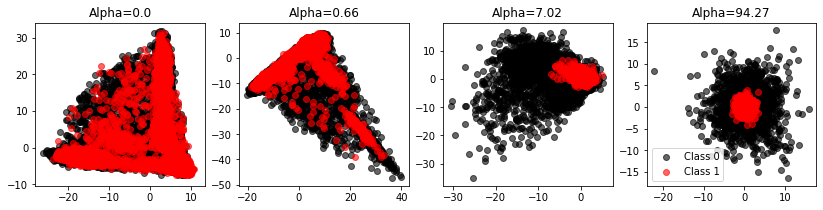

In [ ]:
from contrastive import CPCA

mdl = CPCA()
projected_data = mdl.fit_transform(target,backg,plot = True,active_labels = labels)

In [ ]:
adata.obs

,tsne1,tsne2,cluster_original,sample,diagnosis,stage,age,sex,region,Capbatch,...,DMGM_UL,DMGM_DL,DMWM,n_genes,percent_mito,percent_ribo,n_counts,leiden,annot_level_2,annot_level_3
AAACCTGGTCCATGAT-1_5981_BA9,19.121044,-20.540960,3,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3795,0.005292,0.002951,9827.0,14,Glutamatergic,L5_6
AAACGGGAGTAGCCGA-1_5981_BA9,5.136135,-13.751351,4,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,2510,0.005038,0.004457,5161.0,2,Glutamatergic,L2_3
AAACGGGCATCGGTTA-1_5981_BA9,-28.210752,-20.764837,6A,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3779,0.018633,0.007034,8104.0,10,GABAergic,PV
AAACGGGTCCATGAAC-1_5981_BA9,29.946121,-15.725056,2,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3376,0.016441,0.007046,7238.0,12,Glutamatergic,L4
AAAGATGCACGACTCG-1_5981_BA9,25.065271,-19.422704,3,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,4337,0.007789,0.002841,10913.0,21,Glutamatergic,L5_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTTAAGA-1_MS200_A303,-5.428651,17.107557,5,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,857,0.003260,0.011410,1227.0,0,Oligodendrocyte,Oligodendrocyte
TTTGTCAGTTCGCGAC-1_MS200_A303,34.011235,-18.509118,2,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,5463,0.010610,0.018160,14703.0,9,Glutamatergic,L4
TTTGTCAGTTCTGGTA-1_MS200_A303,-16.622547,20.910561,8,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,1560,0.018838,0.003925,2548.0,1,Astrocyte,Astrocyte
TTTGTCATCCAAATGC-1_MS200_A303,-5.947137,-35.594686,16,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,814,0.051595,0.019700,1066.0,8,Glutamatergic,PYR


In [ ]:
lst = adata.obs['annot_level_2'].unique()
print(lst)

['Glutamatergic', 'GABAergic', 'Endothelial', 'Oligodendrocyte_Progenitor', 'Oligodendrocyte', ..., 'Glia_MIX', 'Microglia', 'Phagocyte', 'T_Lymphocytes', 'B_Lymphocytes']
Length: 12
Categories (12, object): ['Astrocyte', 'B_Lymphocytes', 'Endothelial', 'GABAergic', ...,
                          'Oligodendrocyte_Progenitor', 'Phagocyte', 'Stromal', 'T_Lymphocytes']


In [ ]:
from contrastive import CPCA
import numpy as np
adata_c1 = adata[adata.obs.annot_level_2 == lst[4]]
print(adata_c1.shape)
adata_c1_h = adata_c1[adata_c1.obs.diagnosis == 'Control']
adata_c1_d = adata_c1[adata_c1.obs.diagnosis == 'MS']
adata_c1_h_hv = adata_c1_h.X[:,hv_list[0]]

for i in range(1,2000):
  adata_c1_h_hv = hstack((adata_c1_h_hv, adata_c1_h.X[:,hv_list[i]]))
  print(adata_c1_h_hv.shape)
  print(i)

adata_c1_d_hv = adata_c1_d.X[:,hv_list[0]]
for i in range(1,2000):
  adata_c1_d_hv = hstack((adata_c1_d_hv, adata_c1_d.X[:,hv_list[i]]))
  print(adata_c1_d_hv.shape)
  print(i)

d1 = adata_c1_h_hv.toarray()
d2 = adata_c1_d_hv.toarray()
target = np.concatenate((d1,d2),axis = 0)
backg = d1
labels = d1.shape[0]*[1] + d2.shape[0]*[0]



mdl = CPCA()
projected_data,alphas = mdl.fit_transform(target,backg,active_labels = labels,return_alphas =True)

/usr/local/lib/python3.7/dist-packages/contrastive/__init__.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


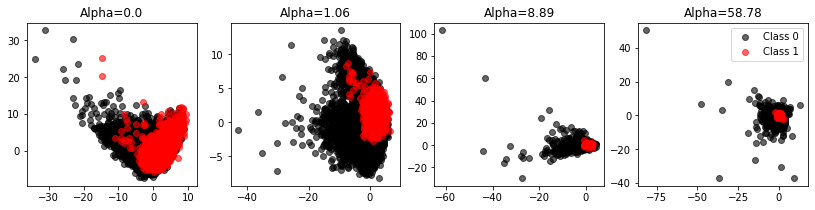

TypeError: ignored

In [ ]:
labels = d1.shape[0]*[1] + d2.shape[0]*[0]



mdl = CPCA()
projected_data,alphas = mdl.fit_transform(target,backg,plot=True,active_labels = labels,return_alphas =True)

/usr/local/lib/python3.7/dist-packages/contrastive/__init__.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


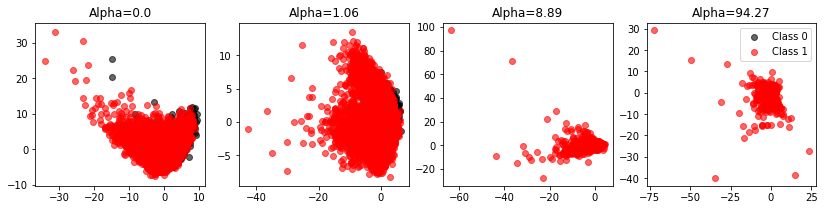

In [ ]:
mdl.fit_transform(target,backg,plot=True,active_labels = labels,return_alphas =True)

In [ ]:
pd = np.array(projected_data[0])


In [ ]:
pd.shape

(12394, 2)

In [ ]:
np.corrcoef(pd.T)

array([[1.00000000e+00, 2.55573216e-08],
       [2.55573216e-08, 1.00000000e+00]])

In [ ]:
min(pd[:,0])

-34.077526

In [ ]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(target)
Scaled_data=scaling.transform(target)

# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)


(12394, 2)


Text(0, 0.5, 'pc2')

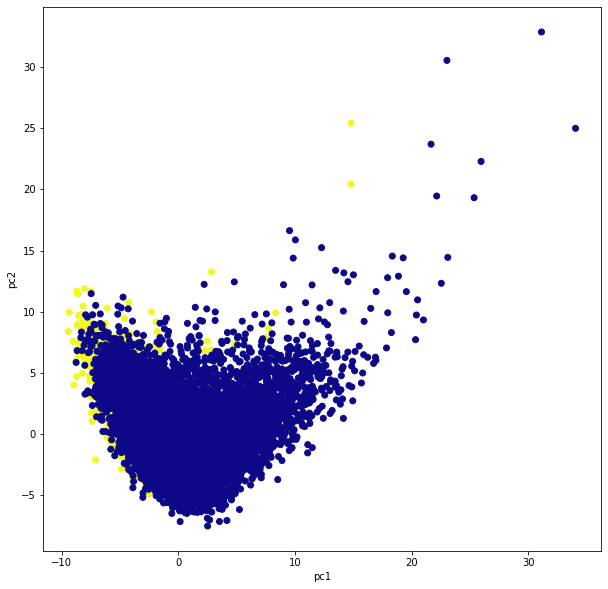

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=labels,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [ ]:
# for ucdata we will use adata2
path = '/content/drive/MyDrive/ucdata.h5ad'
adata2 = sc.read(path)